<a href="https://colab.research.google.com/github/fauziass22/Bike_Sharing/blob/main/Bike2_Dicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Sri Fauzia
- Email:srifauziaarmand@gmail.com
- Id Dicoding:sri_fauzia_y3n




## Menentukan Pertanyaan Bisnis



*   PERTANYAAN 1 : BAGAIMANA PERFORMA PENJUALAN BERDASARKAN BULAN BULAN TERAKHIR?

*   PERTANYAAN 2 : MUSIM APA YANG PALING DIMINIATI PEMINJAM SEPEDA UNTUK BERSEPEDA?

* PERTANYAAN 3 : BAGAIMANA PERFORMA PENGGUNA BERDASARKAN CUACA?

*  PERTANYAAN 4 :BAGAIMANA PERBANDINGAN ANTARA USER BIASA DAN USER TERDAFTAR BERDASARKAN HARI?
* PERTANYAAN 5 : BERIKAN ANALISIS RFM










In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling


### Gathering Data


In [ ]:
day_df=pd.read_csv("../day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
hour_df=pd.read_csv("../hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


### Assessing Data

In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           1
windspeed     1
casual        1
registered    1
cnt           1
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15787 entries, 0 to 15786
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15787 non-null  int64  
 1   dteday      15787 non-null  object 
 2   season      15787 non-null  int64  
 3   yr          15787 non-null  int64  
 4   mnth        15787 non-null  int64  
 5   hr          15787 non-null  int64  
 6   holiday     15787 non-null  int64  
 7   weekday     15787 non-null  int64  
 8   workingday  15787 non-null  int64  
 9   weathersit  15787 non-null  int64  
 10  temp        15787 non-null  float64
 11  atemp       15787 non-null  float64
 12  hum         15786 non-null  float64
 13  windspeed   15786 non-null  float64
 14  casual      15786 non-null  float64
 15  registered  15786 non-null  float64
 16  cnt         15786 non-null  float64
dtypes: float64(7), int64(9), object(1)
memory usage: 2.0+ MB


In [ ]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


###CLEANING DATA


In [ ]:
day_df.drop(['holiday'], axis=1, inplace=True)

In [ ]:
# convert dteday variable ot date data type
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
day_df['weekday'] = day_df['dteday'].dt.day_name()
day_df.head()

,instant,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
day_df['mnth'] = day_df['dteday'].dt.month_name()
day_df.head()

,instant,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,January,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,January,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,January,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,January,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,January,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
day_df['season'] = day_df['season'].map({
    1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'
})
day_df.head()

,instant,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,January,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,January,Sunday,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,January,Monday,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,January,Tuesday,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,January,Wednesday,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear',
    2: 'Cloudy',
    3: 'Rain',
    4: 'Severe Weather'
})
day_df.head()

,instant,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,January,Saturday,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,January,Sunday,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,January,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,January,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,January,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
day_df['workingday'] = day_df['workingday'].map({
    0: 'Holiday',
    1: 'Working Day',
})
day_df.head()

,instant,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,0,January,Saturday,Holiday,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,0,January,Sunday,Holiday,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,0,January,Monday,Working Day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,0,January,Tuesday,Working Day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,0,January,Wednesday,Working Day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
day_df['yr'] = day_df['dteday'].dt.year
day_df.head()

,instant,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,Saturday,Holiday,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,January,Sunday,Holiday,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,January,Monday,Working Day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,January,Tuesday,Working Day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,January,Wednesday,Working Day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)


### Explore ...
* PERTANYAAN 1 : BAGAIMANA PERFORMA PENJUALAN BERDASARKAN BULAN BULAN TERAKHIR?
* PERTANYAAN 2 : MUSIM APA YANG PALING DIMINIATI PEMINJAM SEPEDA UNTUK BERSEPEDA?
* PERTANYAAN 3 : BAGAIMANA PERFORMA PENGGUNA BERDASARKAN CUACA?
* PERTANYAAN 4 :BAGAIMANA PERBANDINGAN ANTARA USER BIASA DAN USER TERDAFTAR BERDASARKAN HARI?
* PERTANYAAN 5 : BERIKAN ANALISIS RFM

## Visualization & Explanatory Analysis


###PERTANYAAN 1 : BAGAIMANA PERFORMA PENJUALAN BERDASARKAN BULAN BULAN TERAKHIR?

In [ ]:
#PERTANYAAN 1#
monthly_rentals = day_df.groupby("mnth")["cnt"].sum()
monthly_rentals.head()

mnth
April       269094
August      351194
December    211036
February    151352
January     134933
Name: cnt, dtype: int64

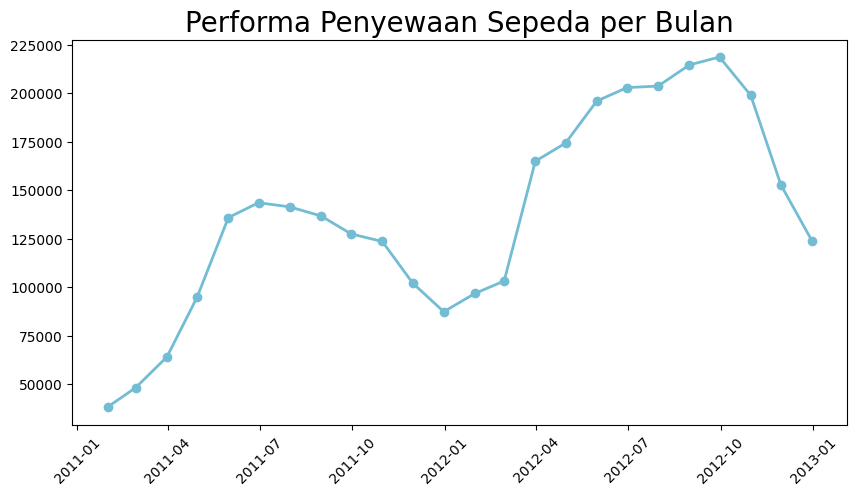

In [ ]:
#MENAMPILKAN SELURUH DATA PER BULAN
from tabulate import tabulate
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

monthly_rentals_df = day_df.resample(rule='M', on='dteday')['cnt'].sum().reset_index()

monthly_rentals_df.rename(columns={'dteday': 'bulan', 'cnt': 'total_penyewaan'}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_rentals_df['bulan'], monthly_rentals_df['total_penyewaan'], marker='o', linewidth=2, color="#72BCD4")
plt.title("Performa Penyewaan Sepeda per Bulan", loc="center", fontsize=20)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
table_data = monthly_rentals_df[['bulan', 'total_penyewaan']].values.tolist()

# Define column headers
headers = ["Bulan", "Total Penyewaan"]

# Print the table using tabulate
table_str = tabulate(table_data, headers, tablefmt="grid")

# Print the formatted table
print(table_str)

+---------------------+-------------------+
| Bulan               |   Total Penyewaan |
+=====================+===================+
| 2011-01-31 00:00:00 |             38189 |
+---------------------+-------------------+
| 2011-02-28 00:00:00 |             48215 |
+---------------------+-------------------+
| 2011-03-31 00:00:00 |             64045 |
+---------------------+-------------------+
| 2011-04-30 00:00:00 |             94870 |
+---------------------+-------------------+
| 2011-05-31 00:00:00 |            135821 |
+---------------------+-------------------+
| 2011-06-30 00:00:00 |            143512 |
+---------------------+-------------------+
| 2011-07-31 00:00:00 |            141341 |
+---------------------+-------------------+
| 2011-08-31 00:00:00 |            136691 |
+---------------------+-------------------+
| 2011-09-30 00:00:00 |            127418 |
+---------------------+-------------------+
| 2011-10-31 00:00:00 |            123511 |
+---------------------+---------

###PERTANYAAN 2 : MUSIM APA YANG PALING DIMINIATI PEMINJAM SEPEDA UNTUK BERSEPEDA?

In [ ]:
#PERTANYAAN 2
most_rented_season = day_df.groupby("season")["cnt"].max().reset_index()
print("Jumlah Peminjam Terbanyak berdasarkan Musim:")
print(most_rented_season)


Jumlah Peminjam Terbanyak berdasarkan Musim:
   season   cnt
0    Fall  8714
1  Spring  7836
2  Summer  8362
3  Winter  8555


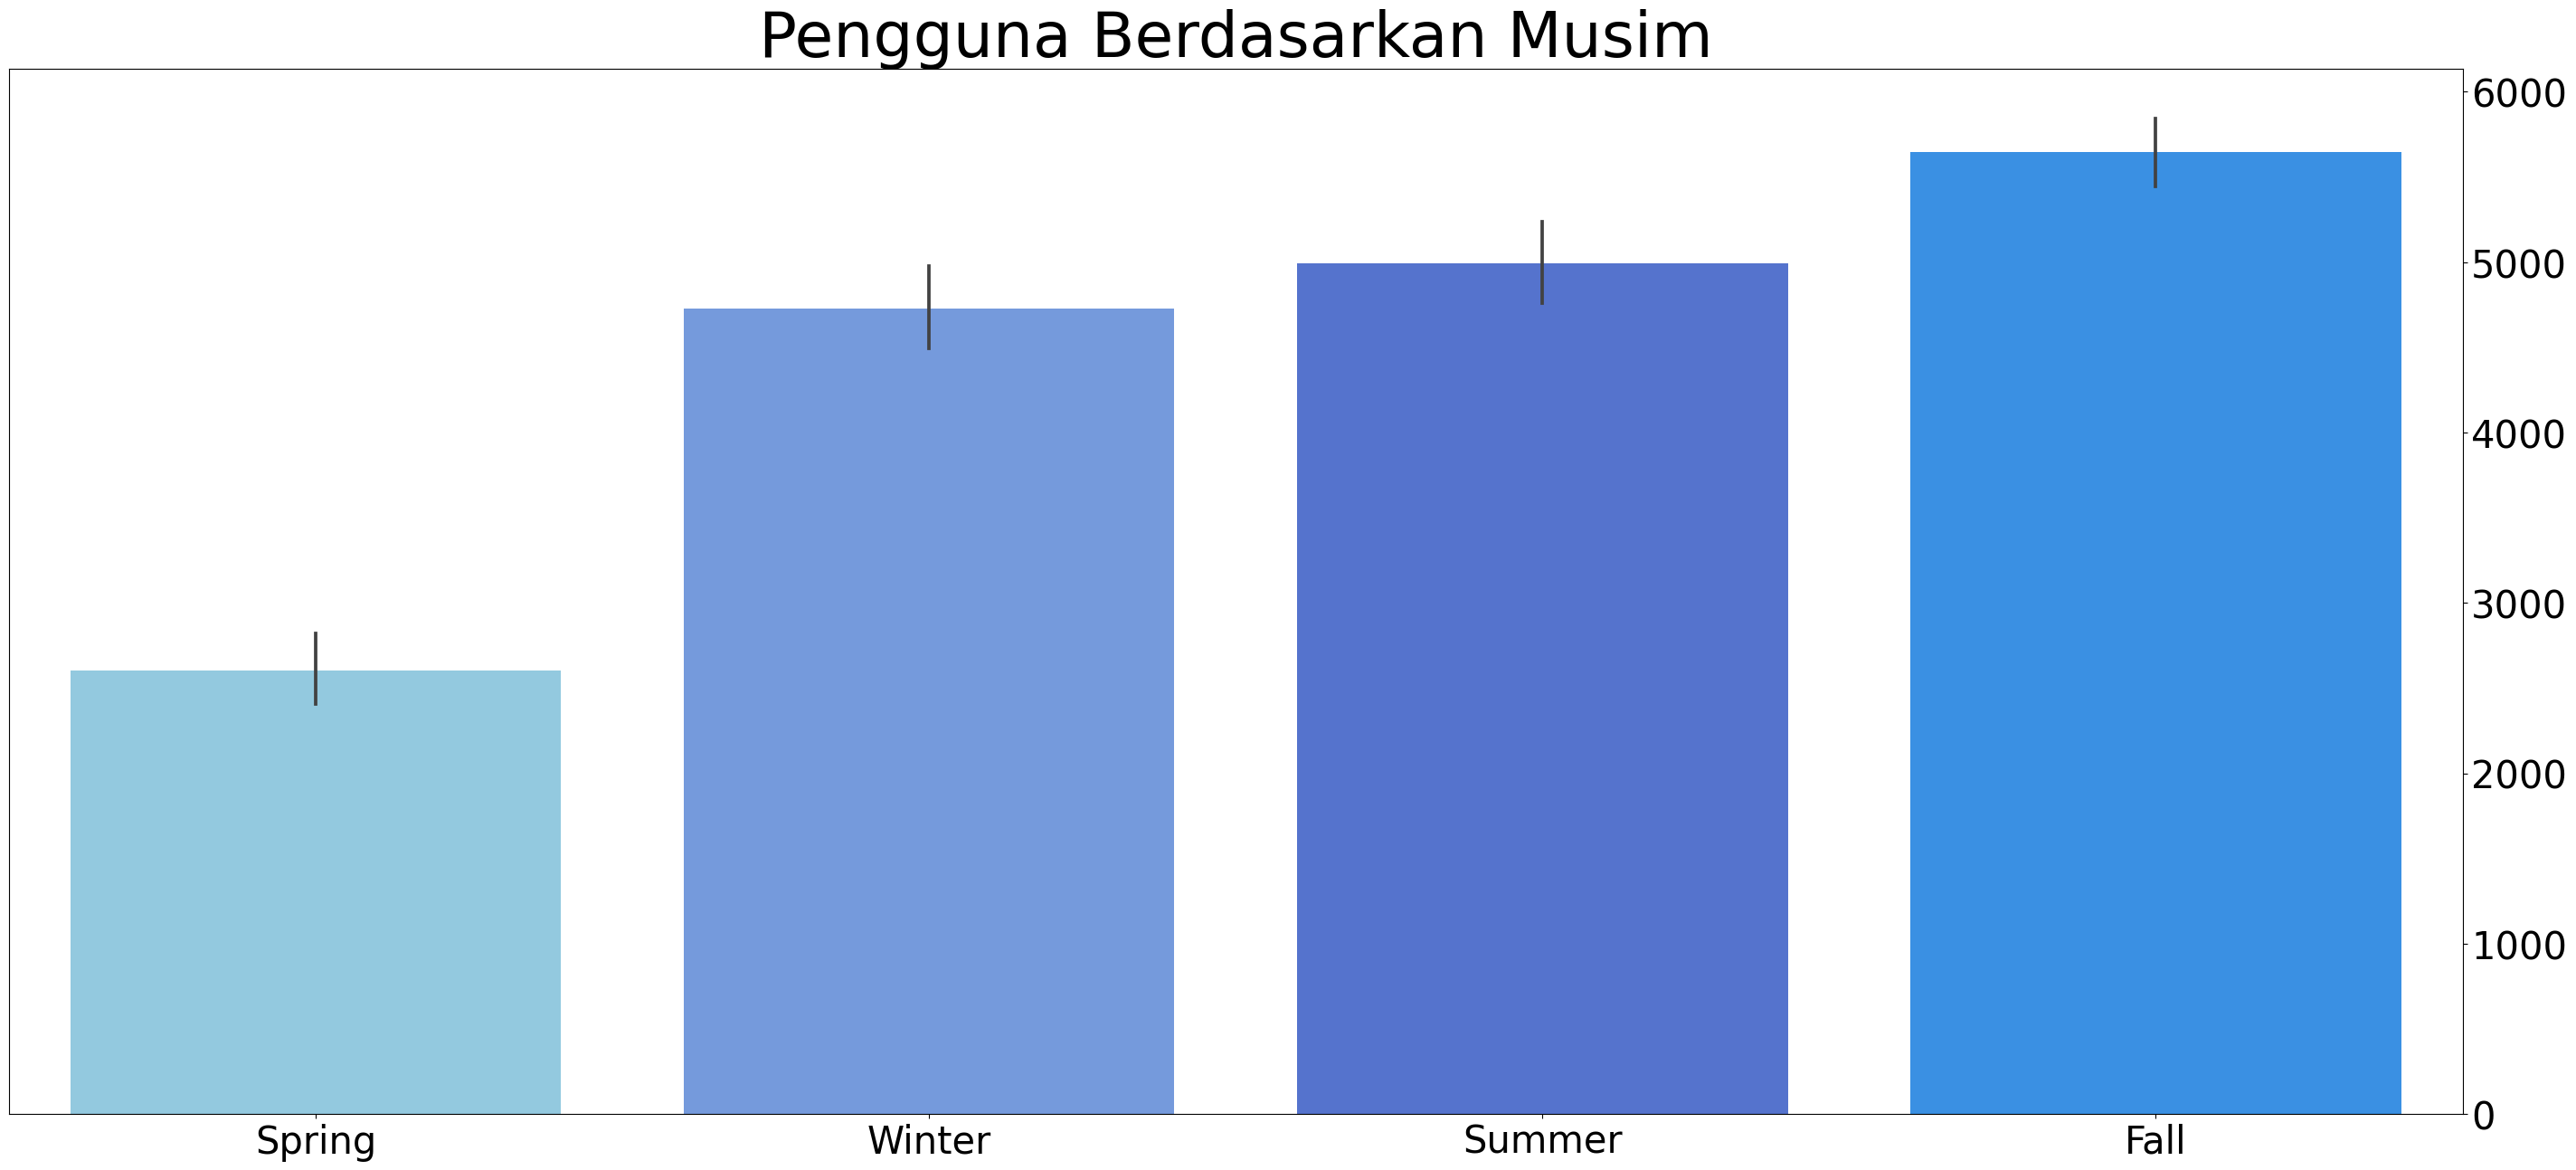

In [ ]:
colors1=['#1E90FF', '#4169E1','#6495ED','#87CEEB']

fig, ax = plt.subplots(figsize=(35, 15))
sorted_df = day_df.sort_values(by="cnt", ascending=False)

# Membuat plot bar
sns.barplot(
    y="cnt",
    x="season",
    data=sorted_df,
    order=day_df.groupby("season")["cnt"].sum().sort_values(ascending=False).index,  # Menggunakan order berdasarkan total cnt
    palette=colors1
)

# Konfigurasi plot
ax.set_title("Pengguna Berdasarkan Musim", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.invert_xaxis()
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.ticklabel_format(style='plain', axis='y')
plt.show()

In [ ]:
season_counts = day_df.groupby("weathersit")["cnt"].sum().sort_values(ascending=False).reset_index()
headers = ["Cuaca", "Count"]
table_str = tabulate(season_counts, headers, tablefmt="grid")

# Print the formatted table
print(table_str)

+----+---------+---------+
|    | Cuaca   |   Count |
+====+=========+=========+
|  0 | Clear   | 2257952 |
+----+---------+---------+
|  1 | Cloudy  |  996858 |
+----+---------+---------+
|  2 | Rain    |   37869 |
+----+---------+---------+




1.   List item
2.   List item



```
# This is formatted as code
```

###PERTANYAAN 3 : BAGAIMANA PERFORMA PENGGUNA BERDASARKAN CUACA?


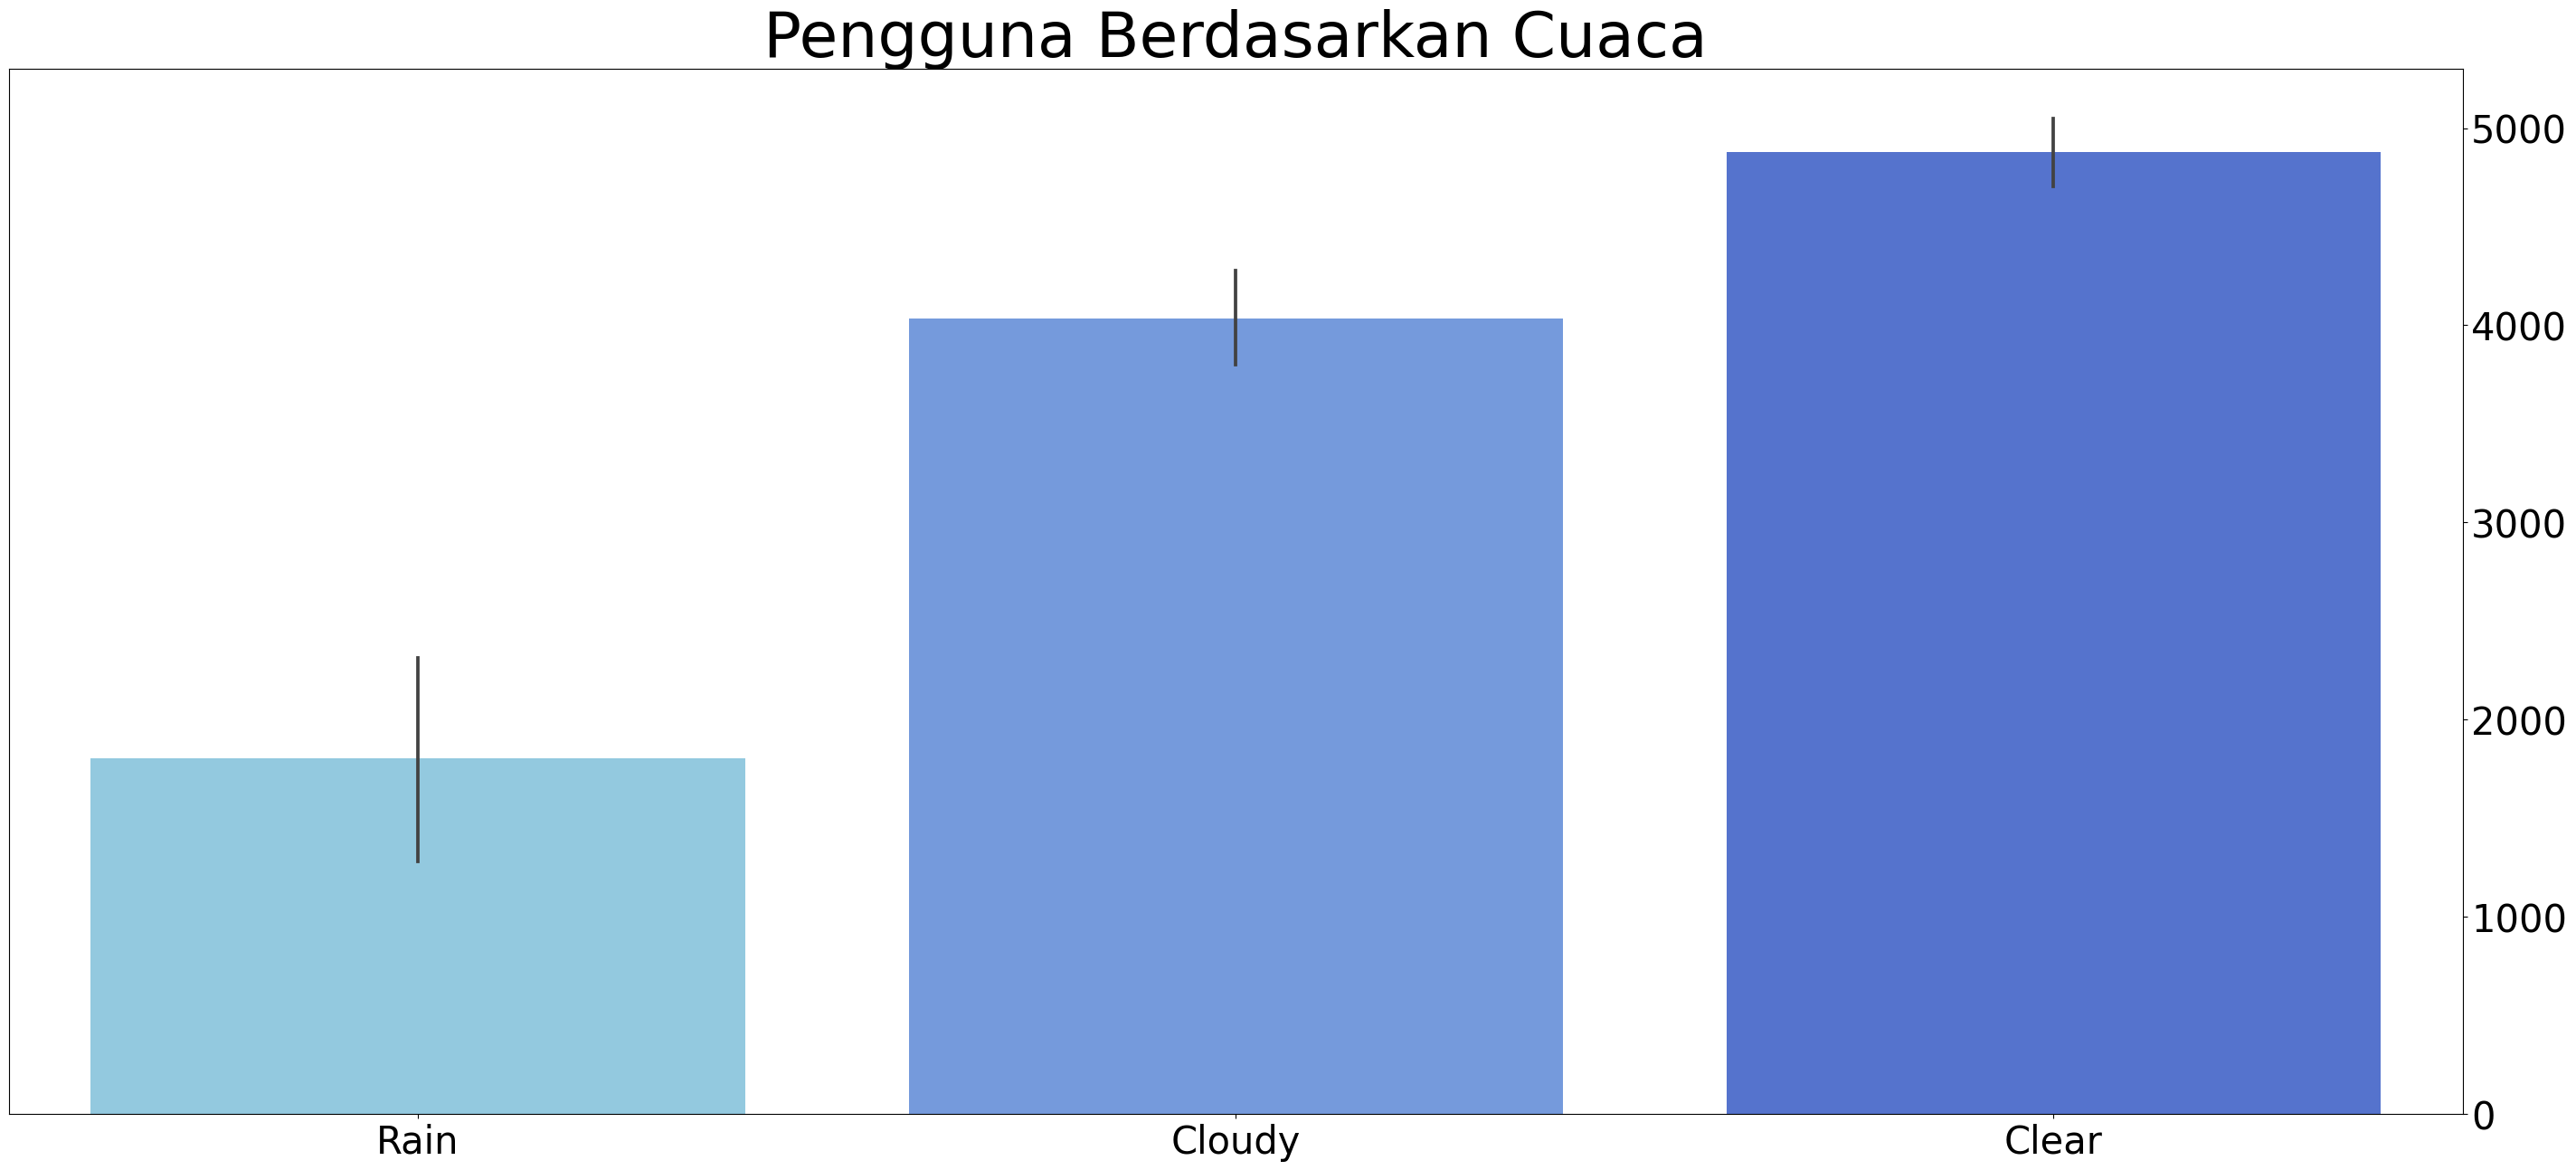

In [ ]:
#PERTANYAAN 3
colors = ['#4169E1','#6495ED','#87CEEB']

# plot bar berdasarkan cuaca
fig, ax = plt.subplots(figsize=(35, 15))
sns.barplot(
    y="cnt",
    x="weathersit",
    data=day_df.sort_values(by="cnt", ascending=False),
    palette=colors
)

# Konfigurasi plot
ax.set_title("Pengguna Berdasarkan Cuaca", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.invert_xaxis()
ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.tick_params(axis='y', labelsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.ticklabel_format(style='plain', axis='y')
plt.show()

###PERTANYAAN 4 :BAGAIMANA PERBANDINGAN ANTARA USER BIASA DAN USER TERDAFTAR BERDASARKAN HARI?


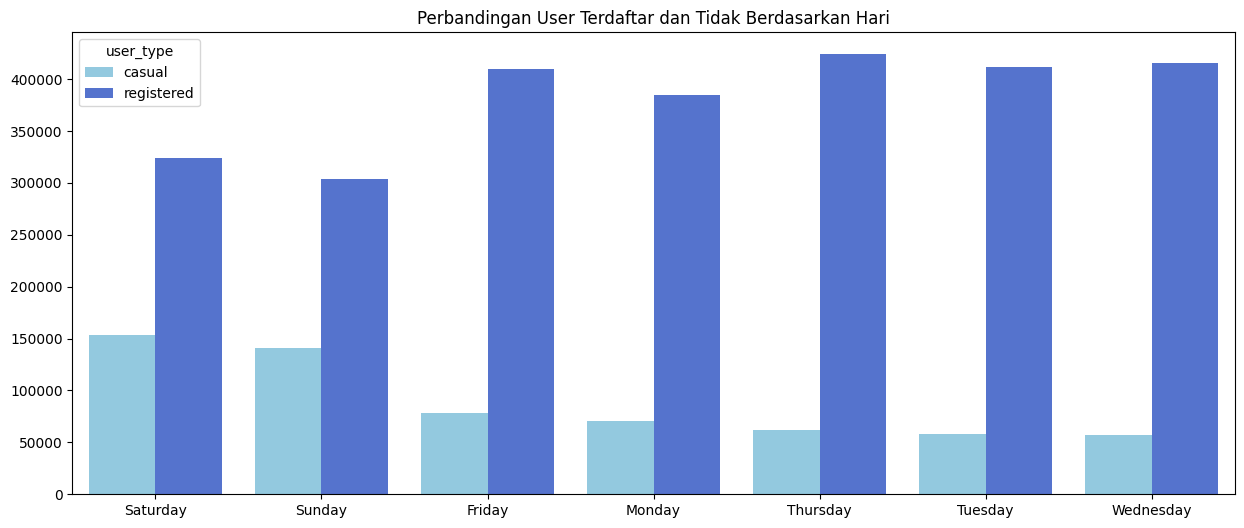

In [ ]:
#PERTANYAAN 4
plt.figure(figsize=(15, 6))
colors3 = ['#87CEEB','#4169E1']
sum_registered_user = day_df.groupby("weekday").registered.sum().sort_values(ascending=False).reset_index()
sum_casual_user = day_df.groupby("weekday").casual.sum().sort_values(ascending=False).reset_index()
daily_user = pd.merge(
    left=sum_casual_user,
    right=sum_registered_user,
    how="left",
    left_on="weekday",
    right_on="weekday"
)
daily_user_type = daily_user.melt(id_vars='weekday', var_name='user_type', value_name='cnt')
sns.barplot(x="weekday", y="cnt", hue="user_type", data=daily_user_type, palette=colors3)
plt.ylabel(None)
plt.xlabel(None)
plt.title("Perbandingan User Terdaftar dan Tidak Berdasarkan Hari")

plt.show()

In [ ]:
headers_registered = ["Weekday", "Sum of Registered Users"]
table_registered_str = tabulate(sum_registered_user, headers_registered, tablefmt="grid")

# Display the table for sum of casual users
headers_casual = ["Weekday", "Sum of Casual Users"]
table_casual_str = tabulate(sum_casual_user, headers_casual, tablefmt="grid")

# Print the formatted tables
print("Table for Sum of Registered Users:")
print(table_registered_str)
print("\nTable for Sum of Casual Users:")
print(table_casual_str)

Table for Sum of Registered Users:
+----+-----------+---------------------------+
|    | Weekday   |   Sum of Registered Users |
+====+===========+===========================+
|  0 | Thursday  |                    423935 |
+----+-----------+---------------------------+
|  1 | Wednesday |                    415729 |
+----+-----------+---------------------------+
|  2 | Tuesday   |                    411266 |
+----+-----------+---------------------------+
|  3 | Friday    |                    409552 |
+----+-----------+---------------------------+
|  4 | Monday    |                    384719 |
+----+-----------+---------------------------+
|  5 | Saturday  |                    323955 |
+----+-----------+---------------------------+
|  6 | Sunday    |                    303506 |
+----+-----------+---------------------------+

Table for Sum of Casual Users:
+----+-----------+-----------------------+
|    | Weekday   |   Sum of Casual Users |
+====+===========+=======================+
|  0 

###PERTANYAAN 5 : BERIKAN ANALISIS RFM





In [ ]:
#PERTANYAAN 5
rfm_df = day_df.groupby(by="weekday", as_index=False).agg({
    "dteday": "max",
    "instant": "nunique",
    "cnt": "sum"
})
rfm_df.columns = ["weekday","max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = rfm_df["max_order_timestamp"].max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,weekday,frequency,monetary,recency
0,Friday,104,487790,3
1,Monday,105,455503,0
2,Saturday,105,477807,2
3,Sunday,105,444027,1
4,Thursday,104,485395,4


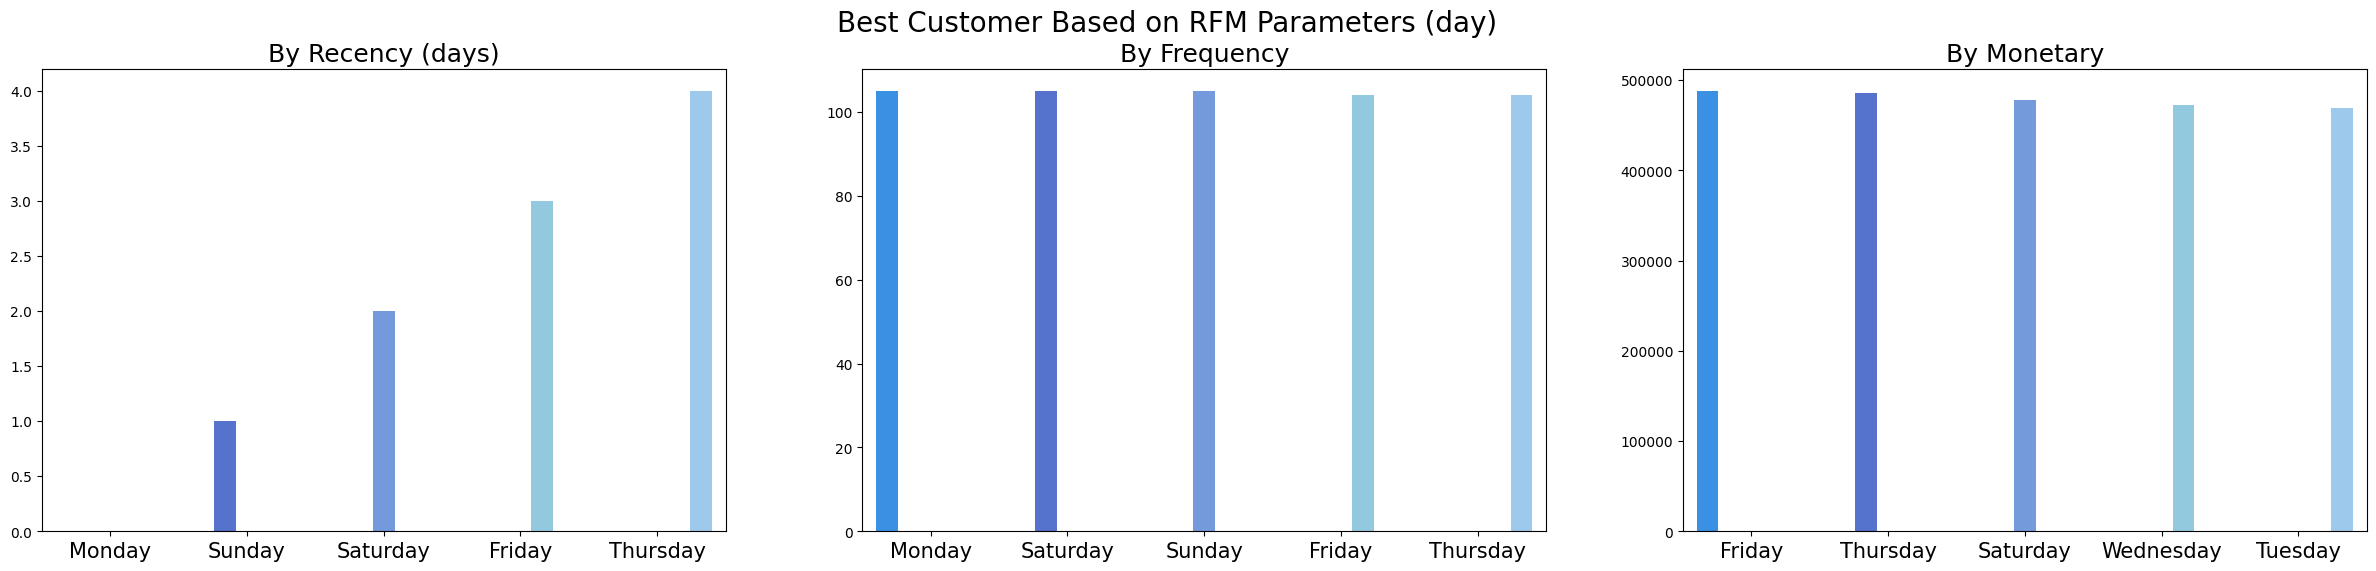

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors= ['#1E90FF', '#4169E1','#6495ED','#87CEEB','#90CAF9']

sns.barplot(y="recency", x="weekday", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, hue="weekday", ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].get_legend().remove()

sns.barplot(y="frequency", x="weekday", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, hue="weekday", ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].get_legend().remove()

sns.barplot(y="monetary", x="weekday", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, hue="weekday", ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
ax[2].get_legend().remove()

plt.suptitle("Best Customer Based on RFM Parameters (day)", fontsize=20)
plt.show()


In [ ]:
day_df.to_csv("/day_clean.csv", index=False)

## Conclusion

- Conclution pertanyaan 1 : Terdapat grafik yang menampilkan jumlah pengguna per bulan dari 2011-2012. Dapat dilihat pengguna terbanyak terdapat pada bulan Oktober 2012
- Conclution pertanyaan 2 : Musim yang paling diminati untuk bersepeda adalah Musim Gugur, dilanjutkan dengan musim panas, dingin dan terakhir musim semi.
- Conclution pertanyaan 3 : Cuaca yang paling diminati pengguna untuk bersepeda adalah saat cuaca cerah, diikuti cuaca berawan dan hujan setelahnya.
- Conclution pertanyaan 4 : Perbandingan antara pengguna biasa dan terdaftar berdasarkan hari dapat dilihat pada grafik. Dari seluruh hari tampk bahwa pengguna terdaftar lebih banyak. Dan hari dengan peminat terbanyak adalah hari kamis
- Conclution pertanyaan 5 : Perusahaan dapat mengidentifikasi pelanggan terbaik berdasarkan Analisis RFM yang dicantumkan pada grafik